In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data,columns = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df = df.drop(columns = ["sepal length (cm)","sepal width (cm)"])

In [13]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [14]:
df["flower"]=iris.target

In [15]:
df.head()

,petal length (cm),petal width (cm),flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [17]:
df0 = df[df.flower == 0]

In [18]:
df1 = df[df.flower==1]

In [19]:
df2 =df[df.flower == 2]

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

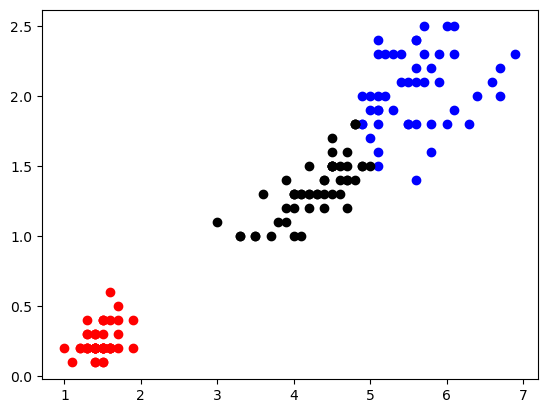

In [36]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color = "blue")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color = "red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color = "black")

In [37]:
df= df.drop(columns = "flower")

In [38]:
from sklearn.cluster import KMeans

In [53]:
km = KMeans(n_clusters = 5)

In [54]:
y = km.fit_predict(df[["petal length (cm)","petal width (cm)"]])

C:\Users\Laraib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
df["flower"]=y
df.head()

,petal length (cm),petal width (cm),flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [56]:
df0 = df[df.flower == 0]

In [57]:
df1 = df[df.flower==1]

In [58]:
df2 =df[df.flower == 2]

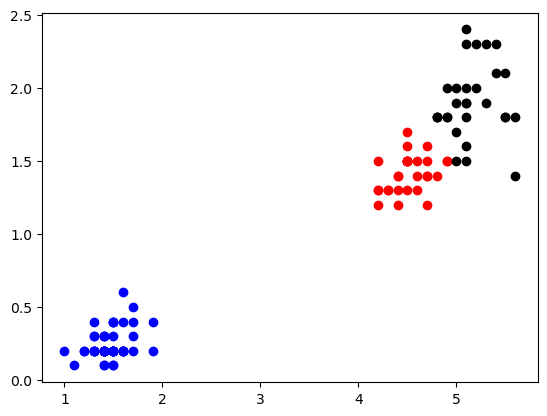

In [59]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color = "blue")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color = "red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color = "black")


In [60]:
sse = []
Ks = range(1,10)
for k in  Ks:
    km = KMeans(n_clusters = k)
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)
    

C:\Users\Laraib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laraib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laraib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laraib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

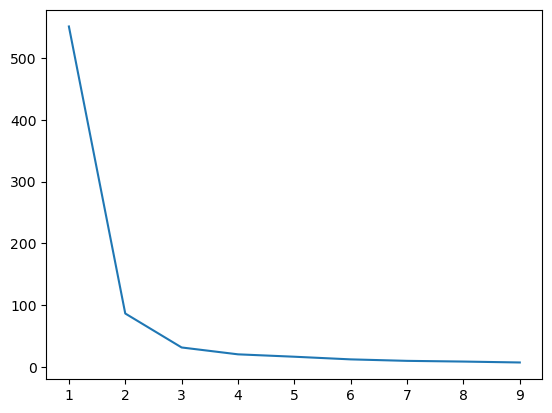

In [61]:
plt.plot(Ks,sse)